In [1]:
%load_ext watermark
%watermark

Loading extensions from ~/.ipython/extensions is deprecated. We recommend managing extensions like any other Python packages, in site-packages.
20/10/2017 19:33:10

CPython 3.6.1
IPython 6.1.0

compiler   : GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)
system     : Darwin
release    : 16.7.0
machine    : x86_64
processor  : i386
CPU cores  : 4
interpreter: 64bit


* MAC: `cmd + shift + P`
* Wincows/Linux: `ctrl + shift + P`

# Hello world!

In [2]:
print("Hello world!")

Hello world!


![Hello wolrd!](https://lazycuriokitty.files.wordpress.com/2013/06/36345108.jpg)

$$c = \sqrt{a^2 + b^2}$$

### Bash

In [5]:
!ls 

fe.py               images              numpy.ipynb         store.ipynb
hello-world.py      jupyter.ipynb       python.ipynb        vizualization.ipynb


In [6]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %watermark  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%pyth

In [7]:
%%html
<h1>Hello from html</h1>
<p>Here is some text</p>

In [ ]:
%env 

In [8]:
!cat hello-world.py

print("Hello world!")


### Execute external file in cell

In [9]:
%run hello-world.py

Hello world!


### Store

In [10]:
my_var = "my variable"
%store my_var
del my_var

Stored 'my_var' (str)


In [12]:
%store -r my_var
my_var

'my variable'

### Variables

In [13]:
var_one = 1
var_two = 2
var_three = 3

%who

my_var	 var_one	 var_three	 var_two	 


In [14]:
var_two = 20

In [15]:
sum_one_two = var_one + var_two

In [16]:
sum_one_two

21

In [ ]:
def sum_one_two(var_one, var_two):
    return var_one + var_two

sum_one_two(1, 20)

### Extract code

In [17]:
%%writefile fe.py

def feature_engineering(data):
    data['year'] = data['datetime'].dt.year
    data['diff_year'] = data['year'] - 2010
    data['month'] = data['datetime'].dt.month
    data['day'] = data['datetime'].dt.day
    data['hour'] = data['datetime'].dt.hour
    data['minute'] = data['datetime'].dt.minute
    data['dayofweek'] = data['datetime'].dt.dayofweek
    data['weekofyear'] = data['datetime'].dt.weekofyear
    data['weekend'] = data.dayofweek.map(lambda x: int(x in [5,6]) )
    data['time_of_day'] = data['hour'].map(cat_hour)
    
    data['dayofyear'] = data['datetime'].dt.dayofyear
    data['day_'] = data[ ['year', 'dayofyear'] ].apply(lambda x: x['dayofyear'] + int(str(x['year'])[-1]) * 365  , axis=1)
    
    data['rush_hour'] = data['datetime'].apply(lambda i: min([np.fabs(9-i.hour), np.fabs(20-i.hour)]))
    data.loc[:,('rush_hour')] = data['datetime'].apply(lambda i: np.fabs(14-i.hour))
    data.loc[data['workingday'] != 0].loc[:,('rush_hour')] = 0
    
    data['holiday'] = data[['month', 'day', 'holiday', 'year']].apply(lambda x: (x['holiday'], 1)[x['year'] == 2012 and x['month'] == 10 and (x['day'] in [30])], axis = 1)
    data['holiday'] = data[['month', 'day', 'holiday']].apply(lambda x: (x['holiday'], 1)[x['month'] == 12 and (x['day'] in [24, 26, 31])], axis = 1)
    
    data['workingday'] = data[['month', 'day', 'workingday']].apply(lambda x: (x['workingday'], 0)[x['month'] == 12 and x['day'] in [24, 31]], axis = 1)
    data['peak'] = data[['hour', 'workingday']].apply(lambda x: (0, 1)[(x['workingday'] == 1 and  ( x['hour'] == 8 or 17 <= x['hour'] <= 18 or 12 <= x['hour'] <= 12)) or (x['workingday'] == 0 and  10 <= x['hour'] <= 19)], axis = 1)
    data['sticky'] = data[['humidity', 'workingday']].apply(lambda x: (0, 1)[x['workingday'] == 1 and x['humidity'] >= 60], axis = 1)

    return data

print("done")

Overwriting fe.py


In [18]:
%pycat fe.py

In [19]:
%run fe.py

done


### Vizualization

In [20]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

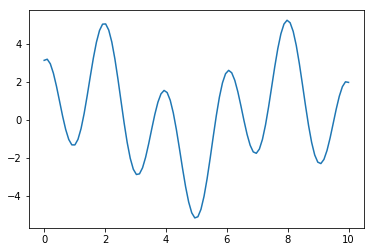

In [21]:
def f(x): return np.pi*np.sin(x) + np.pi*np.cos(np.pi * x) + np.sin(x + np.pi)

x = np.linspace(0, 10, 100)# generate 100 points between 0 and 10
y = f(x)

plt.plot(x, y)

### Multicursor support

In [ ]:
x = [
    'one',
    'two',
    'three'
]

### Caching output

In [22]:
from sklearn.externals.joblib import Memory
memory = Memory(cachedir='/tmp', verbose=1)

@memory.cache
def f(x):
    print('Running f(%s)' % x)
    return x

In [23]:
f(1)

1

In [24]:
f(1)

1

In [25]:
f(2)

2

### Interactive loop

In [26]:
from tqdm import tqdm
import time

for i in tqdm(range(100)):
    time.sleep(0.1)

100%|██████████| 100/100 [00:10<00:00,  9.58it/s]


### Notify

To install it, please run:   
`!pip install jupyternotify`

and restart kernel after.

In [5]:
import jupyternotify
ip = get_ipython()
ip.register_magics(jupyternotify.JupyterNotifyMagics)


%notify -m "sleep for 5 secs"

# import time
# time.sleep(5)

<IPython.core.display.Javascript object>

ERROR:root:Line magic function `%notify` not found (But cell magic `%%notify` exists, did you mean that instead?).
